# (Dataset Exploration Ford Bike System Data 2017 )


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [6]:
da = pd.read_csv('2017-fordgobike-tripdata.csv')
da.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [7]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [8]:
da.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [9]:
da.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [10]:
da.shape

(519700, 13)

- Here I am dropping the useless colum

In [11]:
da.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

-  Here to take advantage of the start time and add the month and day of the week to analyze it.


In [12]:
da['start_time'] = pd.to_datetime(da['start_time'])
da['end_time'] = pd.to_datetime(da['end_time'])
da['hourofday'] = da.start_time.dt.strftime('%H')
da['month'] = da['start_time'].apply(lambda x: x.strftime('%B').lower())
da['day_of_week'] = da['start_time'].apply(lambda x: x.strftime('%A').lower())

In [13]:
day_orginze = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday','sunday']
da['day_of_week'] = pd.Categorical(da['day_of_week'],categories= day_orginze,  ordered = True)

In [14]:
da.month.value_counts()

october      108937
september     98558
november      95612
december      86539
august        83292
july          44073
june           2689
Name: month, dtype: int64

- How many stations we have

In [15]:
da.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

### What is the structure of your dataset?

- Trip Duration "seconds" :

- Start Time and "Date"

- End Time and "Date"

- Start Station "ID"

- Start Station "Name"

- End Station "Name"

- Bike "ID"

- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

- month "date"

- day_of_month "date"


### What is/are the main feature(s) of interest in your dataset?
 I'm most interested in figuring out: 
- Average duration time.
- What type of user is most likely using the bike.
- how many  Number of trips per month.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start date / time and duration of each trip will help you understand the average length and time of the trip and may affect all start and end stations because busy places should receive more trips. I also think the user type, age and gender will have an effect on the flight duration: 

- duration_sec column will help me average flight time.

- The month column will help me with my monthly bike riding directions.

- the user_type column will help me sort out the average flight times

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> The distribution now looks closer to normal distribution. But, there is a long tail still. Let's remove the long tail.



- I could convert a second to a minute.

In [16]:
da['duration_min']= da['duration_sec'] / 60

Text(0, 0.5, 'number of user')

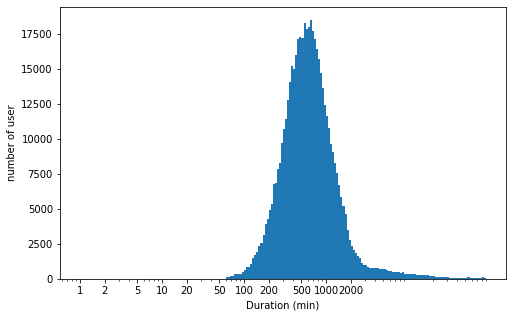

In [20]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(da['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = da, x = 'duration_sec', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)')
plt.ylabel('number of user')

- From the conclusion of the graph, the distribution appears to be closer to the normal distribution.

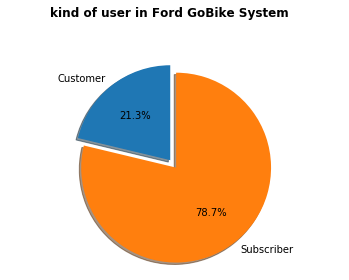

In [21]:
customer_ratio = len(da.query('user_type == "Customer"'))/len(da)
subscriber_ratio = len(da.query('user_type == "Subscriber"'))/len(da)

labels = 'Customer', 'Subscriber'
sizes = [customer_ratio,subscriber_ratio];
explode = (0.1,0) ; # only "explode" the 1st slice 

fig1, ax1 = plt.subplots();
ax1.pie(sizes, explode=explode, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%');
ax1.axis('equal') ; # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('kind of user in Ford GoBike System', y=1.05, fontsize=12, fontweight='bold');

- From here we know that subscribers are the majority, far from customers.

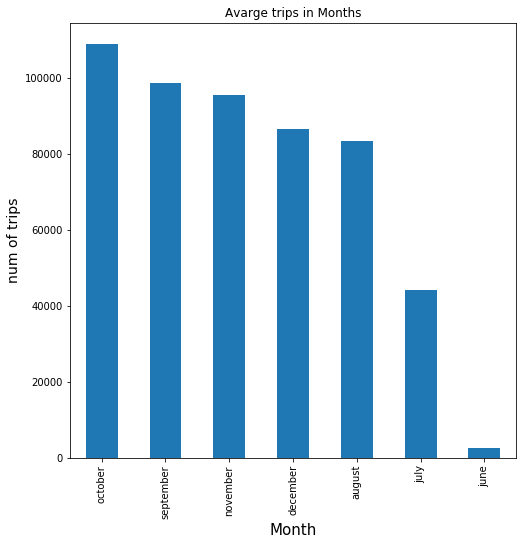

In [22]:
ax1=da.month.value_counts().plot(kind='bar',figsize=(8,8),title='Avarge trips in Months');
ax1.set_xlabel("Month",fontsize=15);
ax1.set_ylabel("num of trips",fontsize=14);

- We could see that october are busy month 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 - We can see from the above plots that I used trip duration, months, and user type, and I don't think it has any unusual points, I had to make a shift in flight duration from sec to min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 - At first the time flight distribution was not uniform

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

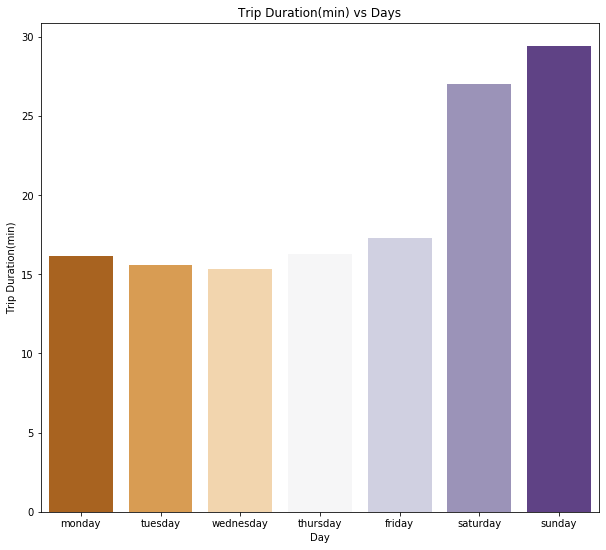

In [23]:

plt.figure(figsize = [10,9])
ax1 = sb.barplot(data=da,x='day_of_week',y='duration_min', color=sb.color_palette()[0], palette="PuOr", ci=None)
plt.xlabel('Day')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Days');

- We also note that on weekends, users use longer bikes than on the rest of the week

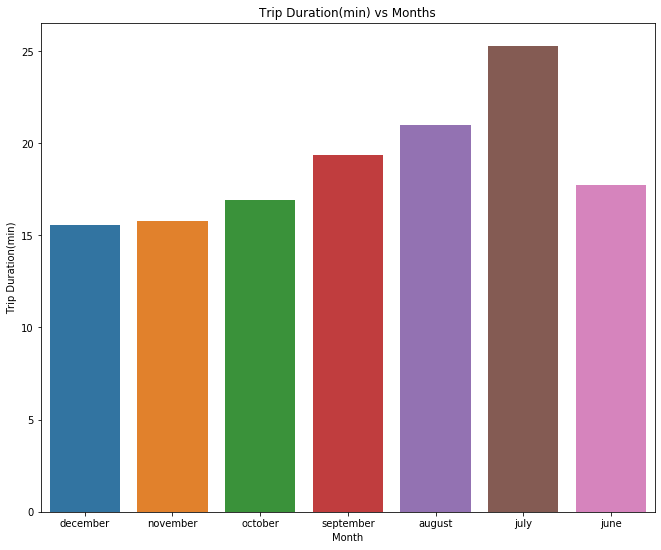

In [24]:
plt.figure(figsize = [11,9])
ax1 = sb.barplot(data=da,x='month',y='duration_min', ci=None)
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Months');

- Also we can see that in July and August, we see that the users use the bike in the summer season more than others

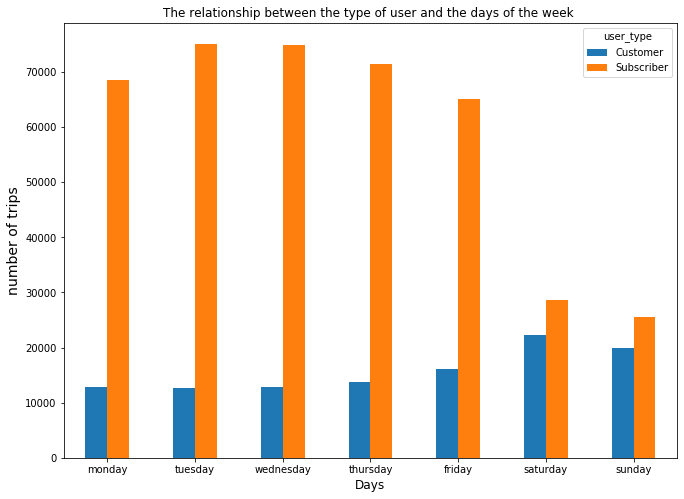

In [25]:
ax1 = pd.crosstab(da['day_of_week'], da['user_type']).plot(kind='bar', stacked=False, title='The relationship between the type of user and the days of the week ',figsize=(11,8));
ax1.set_xlabel("Days",fontsize=12);
plt.xticks(rotation = 0)
ax1.set_ylabel("number of trips",fontsize=14);

- From this we can see that on weekends the customer and subscriber number are close, not like other days

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - We have seen that users use their bicycles for a longer period of time in the summer months
> - We have seen the relationship between user type and days of the week. 
> - We have seen that we have an increase relationship between days of the week and duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I want to say that the relationship between the type of user and the days of the week showed me useful things because I previously counted the types of users and subscribers used bicycles more than customers, but when we saw that most customers use them only on weekends, and here we can do something more on weekends to attract More clients.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

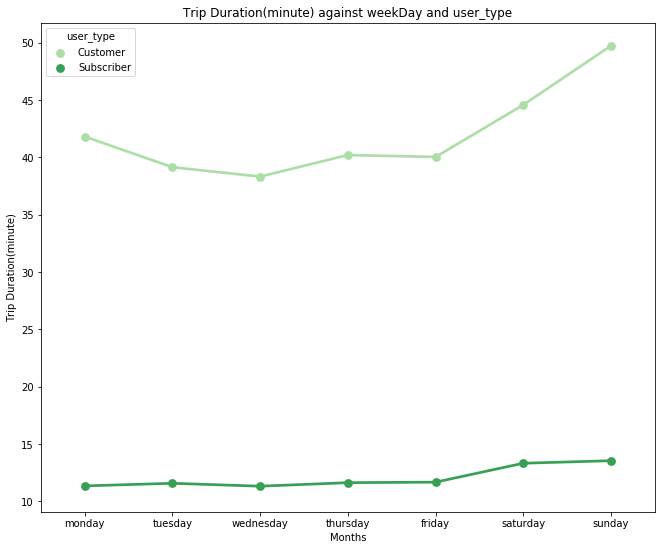

In [26]:
plt.figure(figsize = [11,9]);
ax1 = sb.pointplot(data=da,x='day_of_week',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='Greens', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration(minute)');
plt.title('Trip Duration(minute) against weekDay and user_type');
plt.xticks(rotation = 0);

- We noticed that the customer and subscriber use the bikes a lot more on weekends

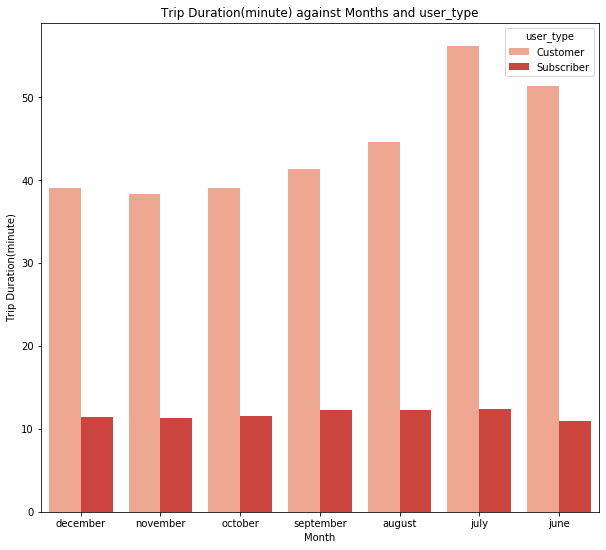

In [27]:
plt.figure(figsize = [10,9]);
ax1 = sb.barplot(data=da,x='month',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='Reds', ci=None);
plt.xlabel('Month');
plt.ylabel('Trip Duration(minute)');
plt.title('Trip Duration(minute) against Months and user_type');
plt.xticks(rotation = 0);

- We've seen customers often use the bike much longer than subscribers

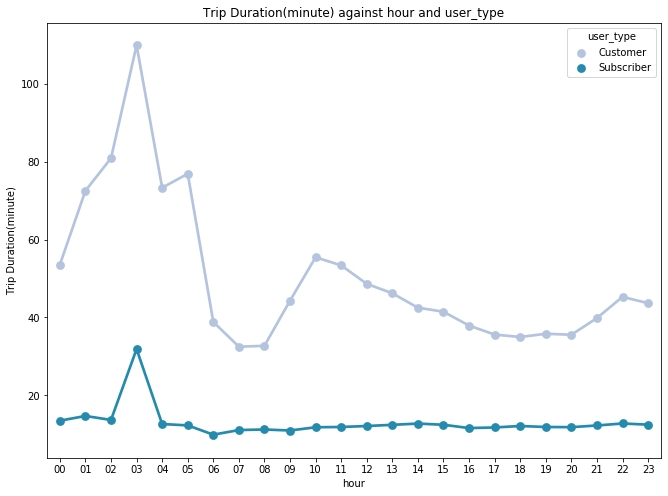

In [28]:
plt.figure(figsize = [11,8]);

axx = sb.pointplot(data=da,x='hourofday',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='PuBuGn', ci=None);
plt.xlabel('hour');
plt.ylabel('Trip Duration(minute)');
plt.title('Trip Duration(minute) against hour and user_type');
plt.xticks(rotation = 0);

- From this we can see that the duraion that started at 3 am have a higher duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - You established a relationship between months and user type versus trip time

### Were there any interesting or surprising interactions between features?

> - We have seen that a large group of customers use the bike for a much longer period of time than subscribers. Through this, we can set some assumptions and may lead to some ideas that we can benefit from.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

Refrance  : 
    
    - https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    - https://www.movable-type.co.uk/scripts/latlong.html
    - https://github.com/FotisKyr/DataAnalyst_Project4_Communicate_Data_Findings/blob/master/visualize_data.ipynb
    - https://github.com/nyuliani/Ford-GoBike-Data-Analysis/blob/6f2c7c23c8370dc29f88055fdf3cc06165621286/gobike_exploration.ipynb
    
    - https://github.com/FotisKyr/DataAnalyst_Project4_Communicate_Data_Findings/blob/master/visualize_data.ipynb